# Planet Viewing Example

This example shows how to plot geometric quantities using the frames system.


Then we import GODOT modules and create a universe from configuration.

The [universe](./universe.yml) contains an entry to insert a keplerian orbit point, named 'SC' into the frames system.

We setup the selfverse as defined in the yml file.
Furthermore we define a timespan, here one month, evaluated in 30 seconds timesteps.

In [42]:
from godot.core import tempo
from godot import cosmos

# optionally avoid verbose logging messages
import godot.core.util as util
util.suppressLogger()

from mani import GodotHandler
from mani import VisibilityModel
# specify a time grid
t1 = tempo.Epoch('2026-01-01T00:00:00 TDB')
t2 = tempo.Epoch('2026-04-01T00:00:00 TDB')

godotHandler = GodotHandler(t1, t2, 1.0, './universe2.yml')
godotHandler.initialize_halo_orbit(godotHandler.get_event_grid(), 1000)
import os
os.makedirs('./output/los/', exist_ok=True)

Time (TU),X (LU),Y (LU),Z (LU),VX (LU/TU),VY (LU/TU),VZ (LU/TU)



In [43]:
from mani import UniversePlotter
import matplotlib.pyplot as plt
from mani.utils import convert_to_datetime
def plot_spacecraft(ax,t):
    uni = UniversePlotter(godotHandler, 'CB11', t, 10.0)

    axis_size = 12
    legend_size = 12

    uni.plot_moon(ax)
    uni.plot_earth(ax)
    uni.plot_spacecraft(ax)
    uni.plot_groundstation(ax)
    uni.plot_gs_vec(ax)

    ax.set_xlabel("x [km]", fontsize=axis_size)
    ax.set_ylabel("y [km]", fontsize=axis_size)
    ax.set_zlabel("z [km]", fontsize=axis_size)
    
    ax.legend(fontsize = legend_size)
    return uni
    
def plot_scene(t, filename):
    fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(12,6))
    uni = plot_spacecraft(ax1,t)
    uni.set_view_moon_focuced(ax1)
    uni = plot_spacecraft(ax2,t)
    uni.set_view_earth_focuced(ax2,view_distance=7000)

    sup_size = 16
    title_size = 12
    tick_size = 10

    gse = uni.get_gs_elevation() > uni.target_elevation
    gsl = not uni.get_gs_los_status()
    dt = convert_to_datetime(uni.timestamp).strftime('%Y-%m-%D - %H:%M:%S')
    s4 = f"Is the spacecraft above elevation of 10 degrees? {'Yes' if gse else 'No'}"
    s5 = f"Is the moon blocking the line-of-sight? {'Yes' if gsl else 'No'}"
    s6 = f"Groundstation: {uni.gs_name_long}\nTime: {dt}"
    plt.suptitle(f'\n{s4}\n{s5}\n{s6}', y=1.08, fontsize = sup_size)
    fig.savefig('./output/los/'+filename+'.png', bbox_inches = 'tight', pad_inches = 0.2)



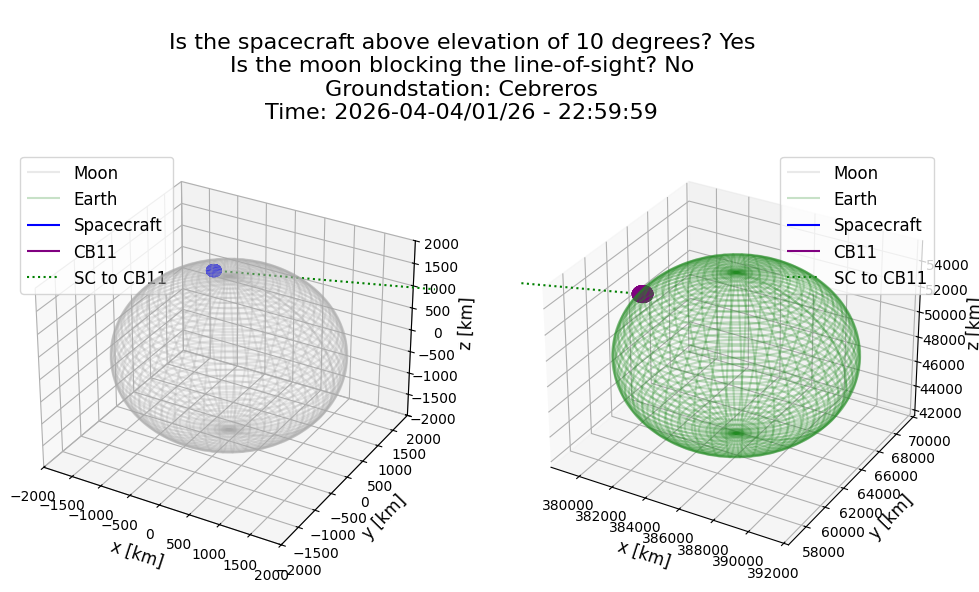

In [44]:
import godot

# Example usage
t = godot.core.tempo.Epoch('2026-04-02T01:00:00 TDB')
plot_scene(t, 'clear_los')
plt.show()

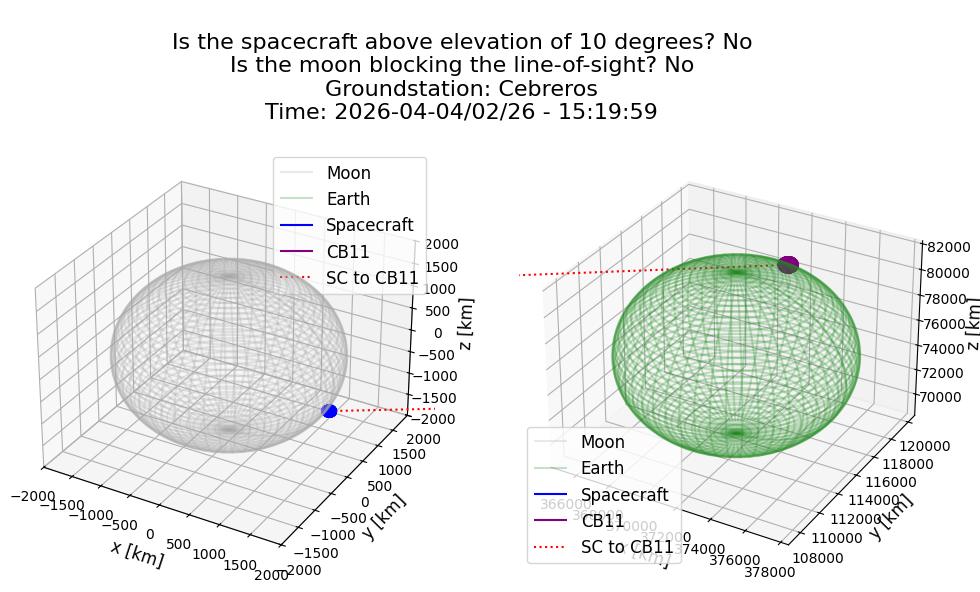

In [46]:
# Example usage
t = godot.core.tempo.Epoch('2026-04-02T17:20:00 TDB')
plot_scene(t, 'no_los')

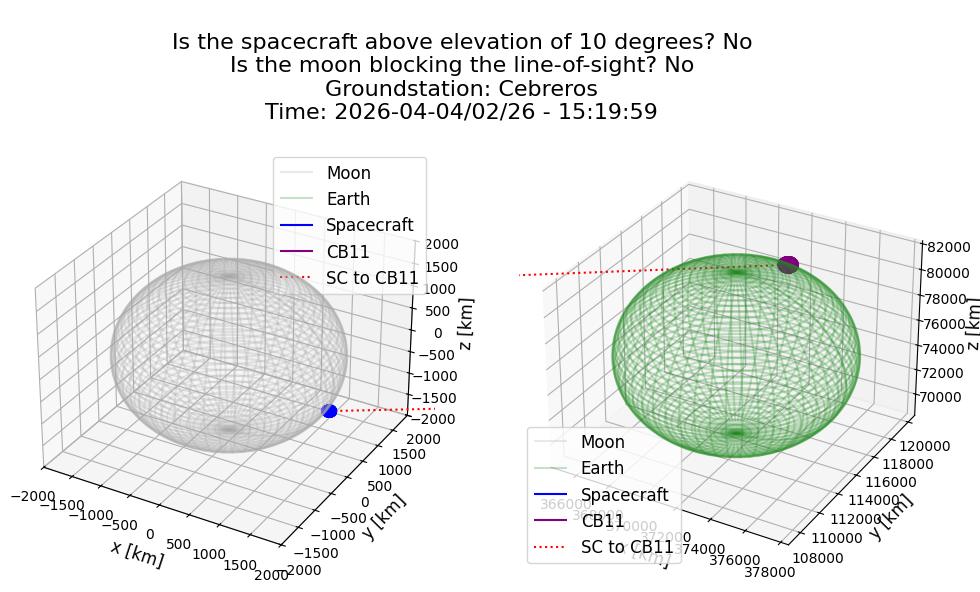

In [47]:
# Example usage
t = godot.core.tempo.Epoch('2026-04-02T17:20:00 TDB')
plot_scene(t, 'idk')

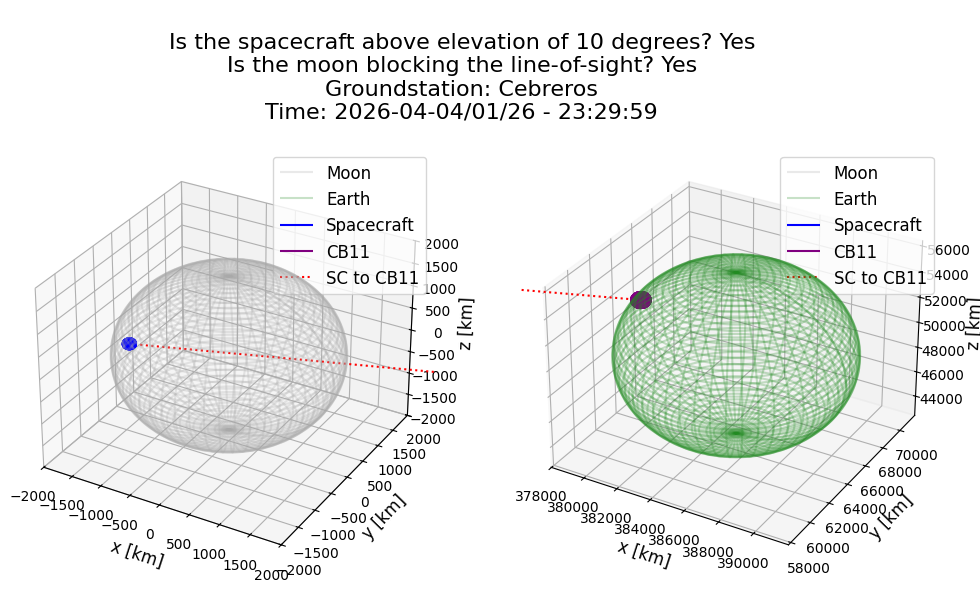

In [50]:
# Example usage
t = godot.core.tempo.Epoch('2026-04-02T01:30:00 TDB')
plot_scene(t, 'moon_block_elev_good')

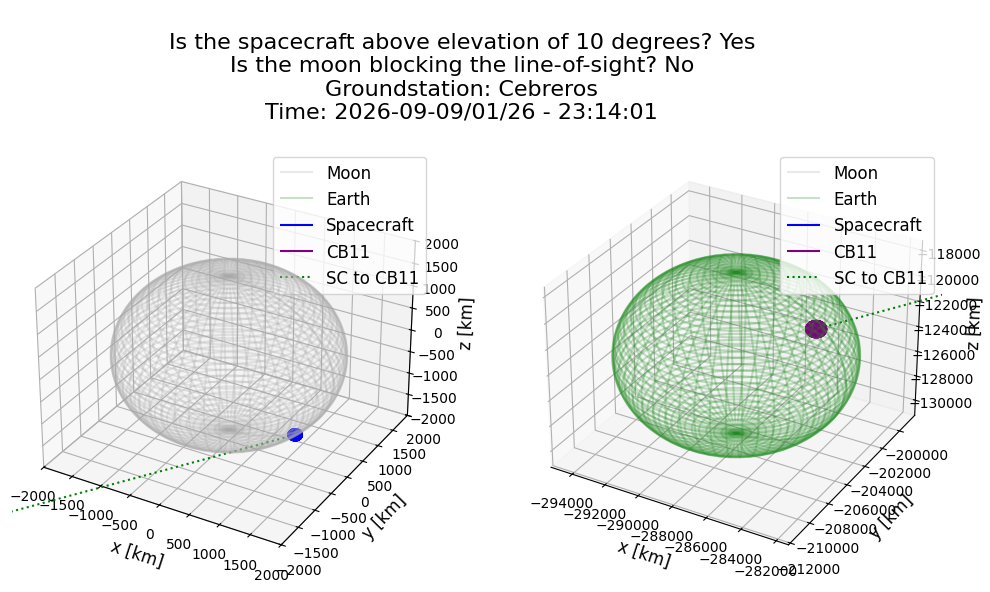

In [51]:
# Example usage
t = godot.core.tempo.Epoch('2026-09-02T01:14:01 TDB')
plot_scene(t, 'elev_good_los_good')

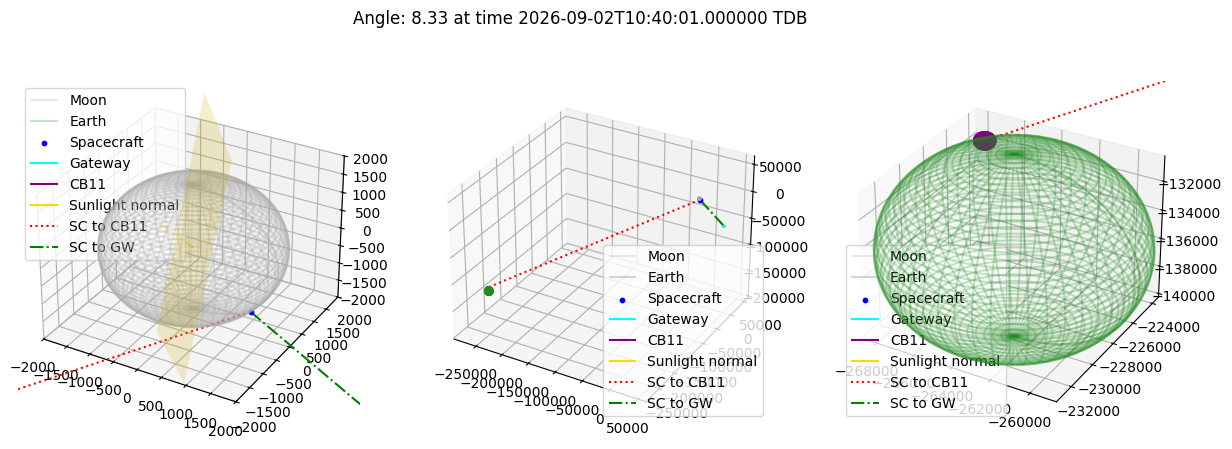

<Figure size 640x480 with 0 Axes>

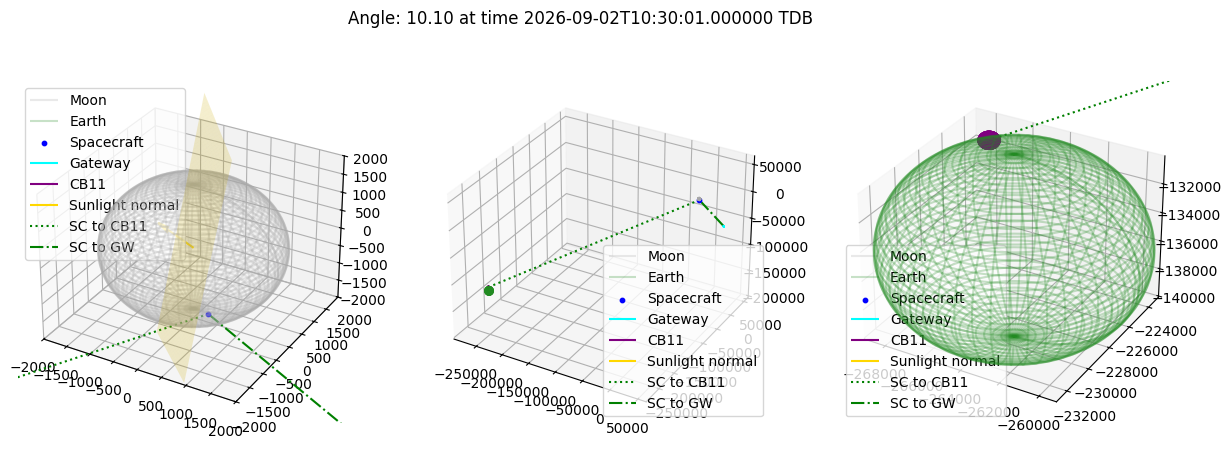

In [ ]:
# Example usage
import numpy as np
t = godot.core.tempo.Epoch('2026-09-02T10:40:01 TDB')
plot_scene(t, 'elev_good_los_good')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw={'projection': '3d'}, figsize=(15,5))
universe = godotHandler.fetch_universe()
uni = UniversePlotter(godotHandler, 'CB11', t, 10.0)
plt.subplot(1,3,1)
uni.plot_universe(ax1)
uni.set_view_moon_focuced(ax1)
plt.subplot(1,3,2)
uni.plot_universe(ax2)
plt.subplot(1,3,2)
uni.plot_universe(ax3)
uni.set_view_earth_focuced(ax3)
plt.axis('equal')
plt.suptitle(f"Angle: {uni.get_gs_elevation():.2f} at time {t}")
plt.show()

plt.figure()
t = godot.core.tempo.Epoch('2026-09-02T10:30:01 TDB')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw={'projection': '3d'}, figsize=(15,5))
GSE = universe.frames.vector3('CB11', 'Earth', 'ICRF', t)
GSSC = universe.frames.vector3('CB11', 'SC', 'ICRF', t)
uni = UniversePlotter(godotHandler, 'CB11', t, 10.0)
plt.subplot(1,3,1)
uni.plot_universe(ax1)
uni.set_view_moon_focuced(ax1)
plt.subplot(1,3,2)
uni.plot_universe(ax2)
plt.subplot(1,3,2)
uni.plot_universe(ax3)
uni.set_view_earth_focuced(ax3)
plt.axis('equal')
plt.suptitle(f"Angle: {uni.get_gs_elevation():.2f} at time {t}")
plt.show()

# Multiple groundstations

In [ ]:
def fullplot(station, t):
    print(station)
    # Example usage
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw={'projection': '3d'}, figsize=(20,6))
    uni = UniversePlotter(godotHandler, station, t,10.0)
    plt.subplot(1,3,1)
    uni.plot_universe(ax1)
    uni.set_view_moon_focuced(ax1)
    plt.subplot(1,3,2)
    uni.plot_universe(ax2)
    plt.subplot(1,3,2)
    uni.plot_universe(ax3)
    uni.set_view_earth_focuced(ax3)
    plt.axis('equal')
    plt.show()


NN11


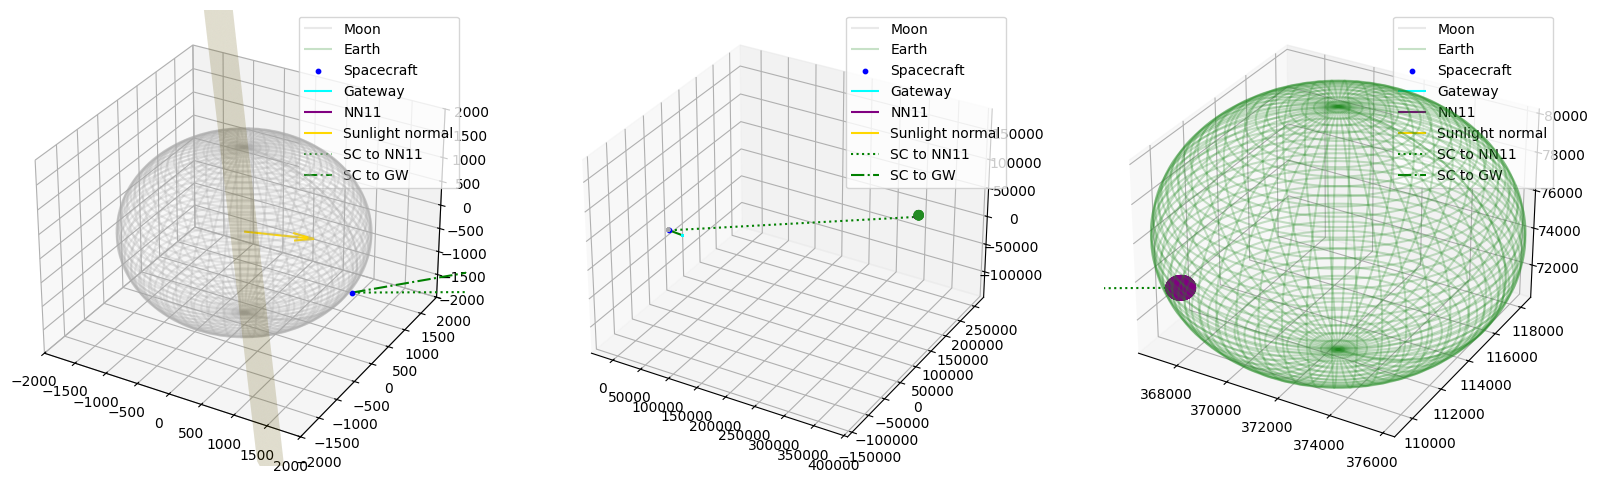

CB11


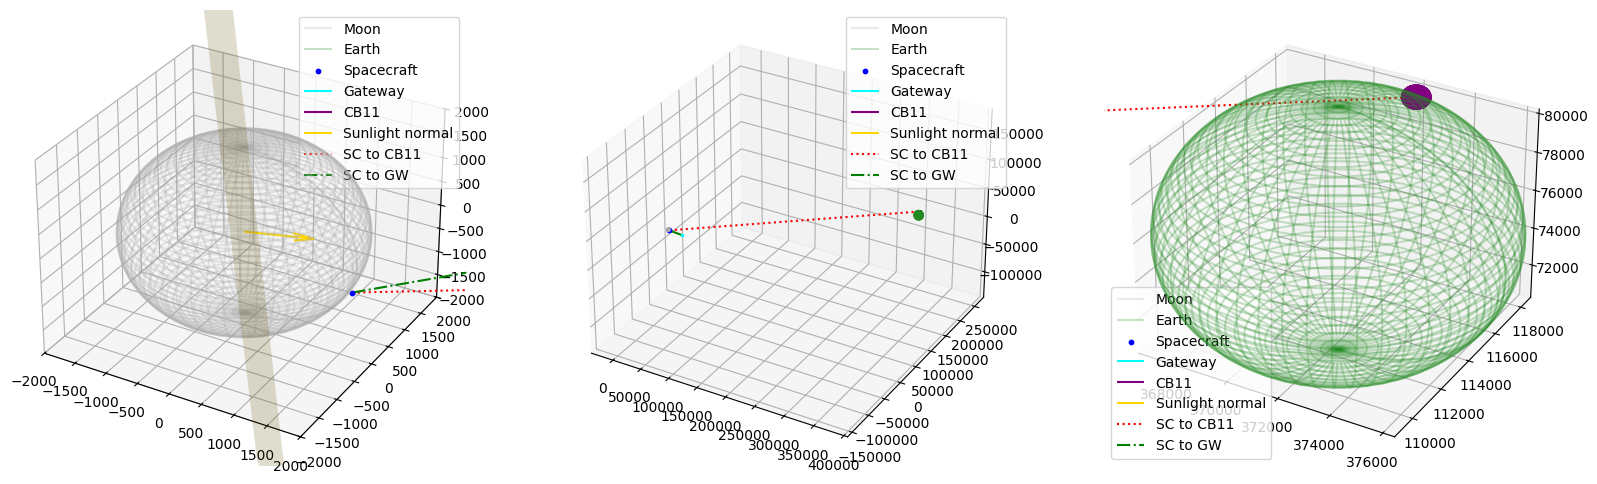

MG11


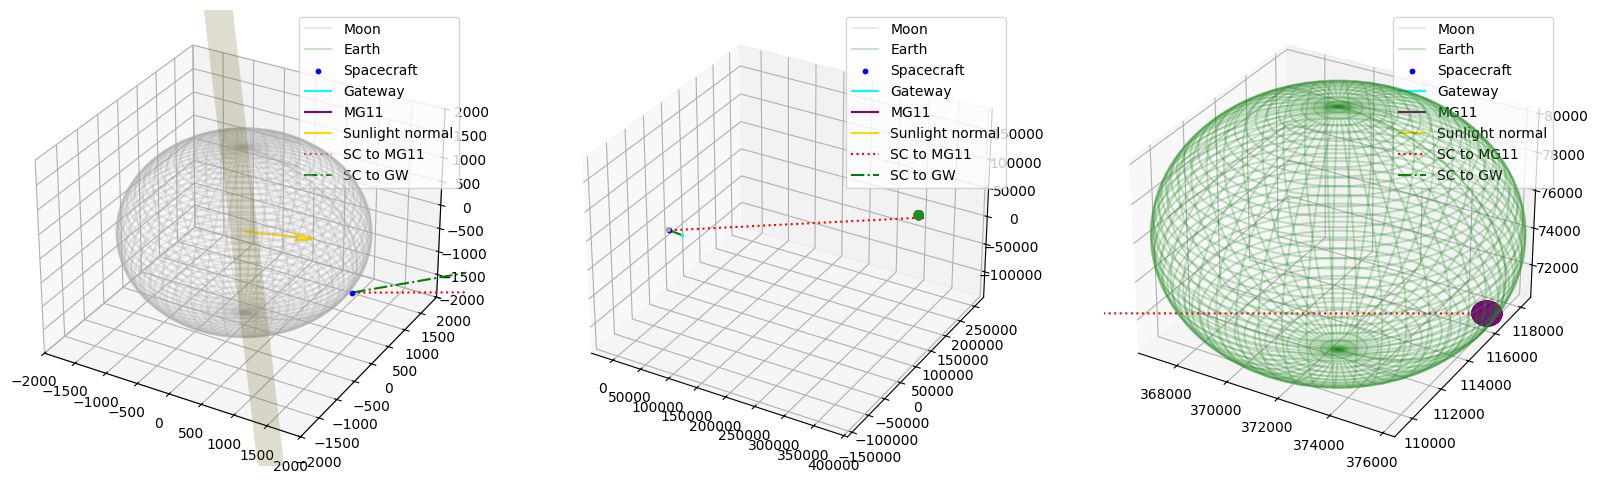

In [ ]:
t = godot.core.tempo.Epoch('2026-04-02T17:20:00 TDB')
stations = ['NN11', 'CB11', 'MG11']
for station in stations:
    fullplot(station, t)

NN11


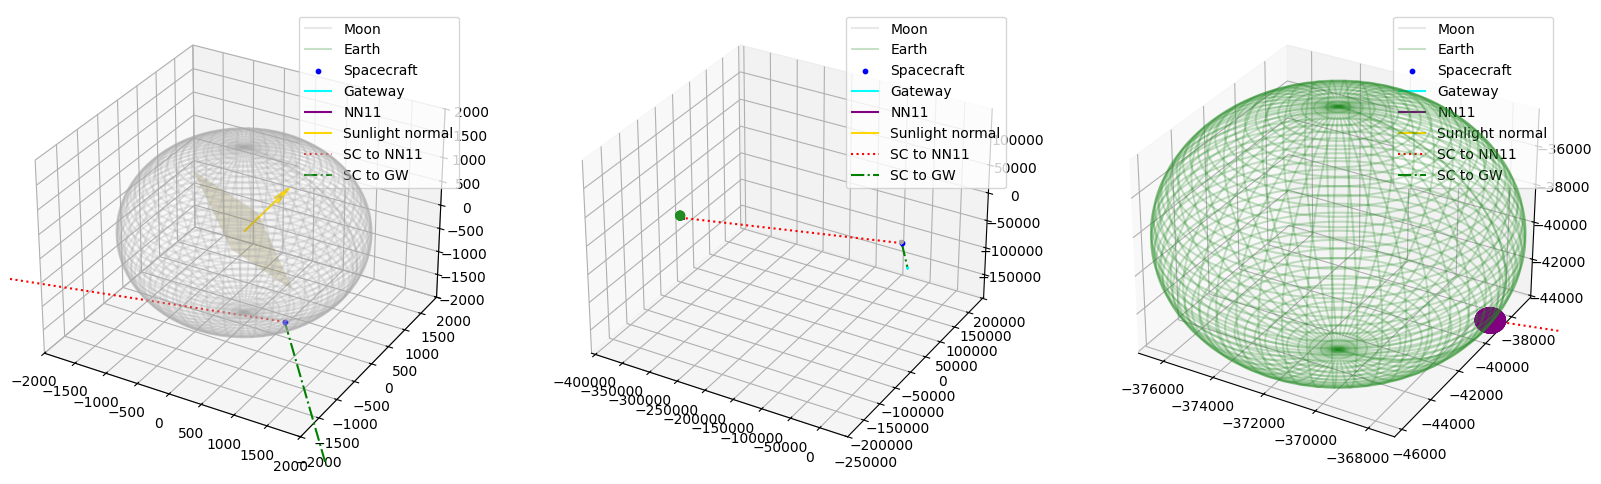

In [ ]:
t = godot.core.tempo.Epoch('2026-06-09T23:48:30.000000 TDB')
fullplot('NN11', t)